In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
players = pd.read_csv("player_stats.csv")
teams = pd.read_csv("team_data.csv")
world_cups = pd.read_csv("world_cups.csv")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features
X = players[['minutes', 'games', 'assists']]
y = players['goals']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error: 0.84
R² Score: 0.17


C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


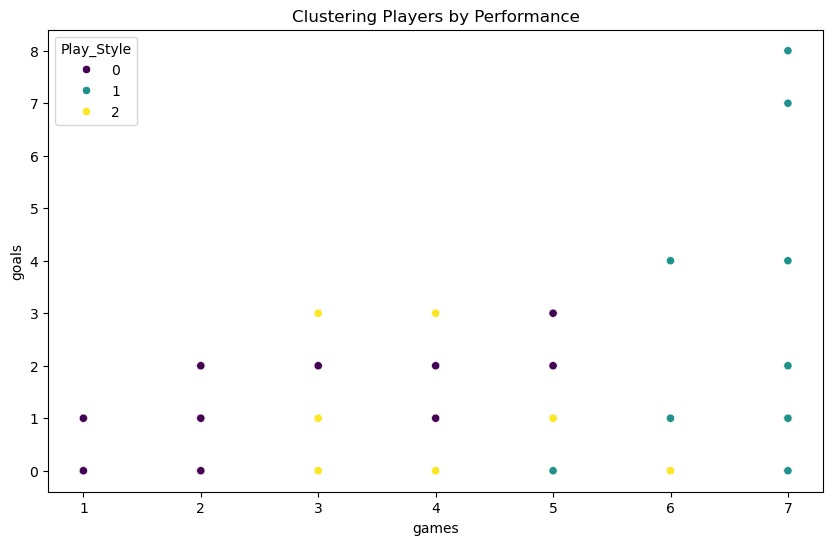

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features for clustering
features = players[['goals', 'assists', 'games', 'minutes']]
kmeans = KMeans(n_clusters=3, random_state=42)
players['Play_Style'] = kmeans.fit_predict(features)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=players, x='games', y='goals', hue='Play_Style', palette='viridis')
plt.title("Clustering Players by Performance")
plt.show()


C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


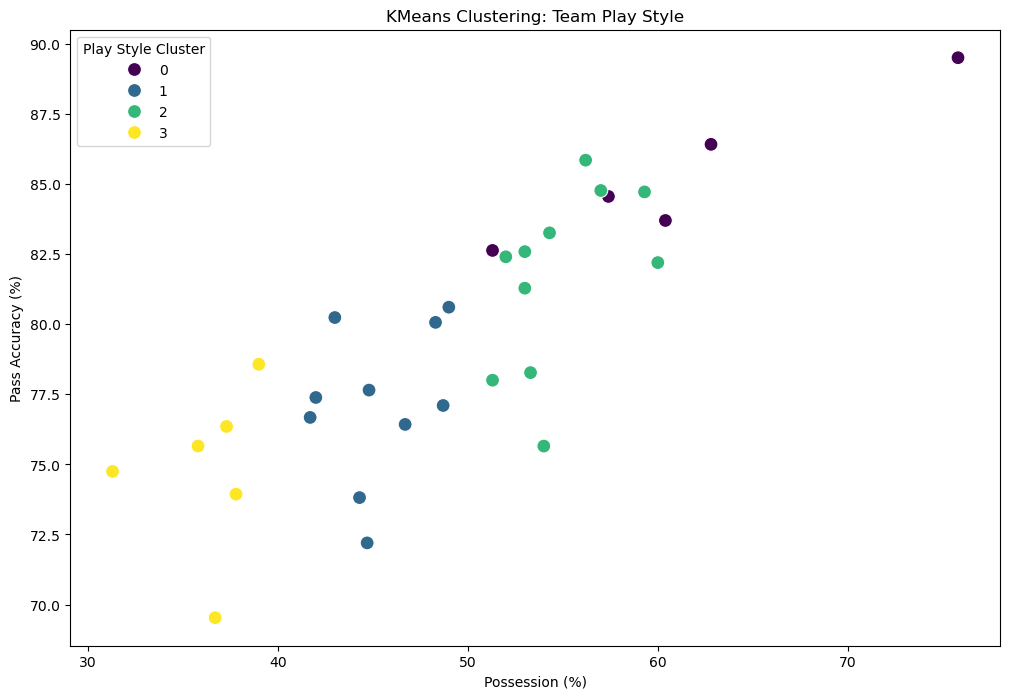

Cluster Centers:
   possession  Pass_Accuracy      goals
0   61.540000      85.367366  13.000000
1   45.320000      77.218620   3.200000
2   54.854545      81.731516   4.454545
3   36.316667      74.800852   4.000000


In [18]:
#1. KMeans Clustering: Grouping Teams by Play Style
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate Pass Accuracy if not already calculated
teams['Pass_Accuracy'] = (teams['passes_completed'] / teams['passes']) * 100

# For `Goals_Conceded`, if it's not in the dataset, use a placeholder or calculate it.
# Here, assuming you have a column `goals_conceded` or you manually calculate it if available.

# Select relevant features for clustering
team_features = teams[['possession', 'Pass_Accuracy', 'goals']]

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
teams['Play_Style'] = kmeans.fit_predict(team_features)

# Plot the clustering results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=teams, x='possession', y='Pass_Accuracy', hue='Play_Style', palette='viridis', s=100)
plt.title("KMeans Clustering: Team Play Style")
plt.xlabel("Possession (%)")
plt.ylabel("Pass Accuracy (%)")
plt.legend(title='Play Style Cluster')
plt.show()

# View cluster centers to analyze the play styles
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=team_features.columns))


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

teams['Pass_Accuracy'] = (teams['passes_completed'] / teams['passes']) * 100

# Perform clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
teams['Play_Style'] = kmeans.fit_predict(teams[['possession', 'Pass_Accuracy', 'goals']])

# Calculate Silhouette Score
silhouette_avg = silhouette_score(teams[['possession', 'Pass_Accuracy', 'goals']], kmeans.labels_)
print("Silhouette Score for KMeans Clustering:", silhouette_avg)


Silhouette Score for KMeans Clustering: 0.31054393887977333


C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KNN Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


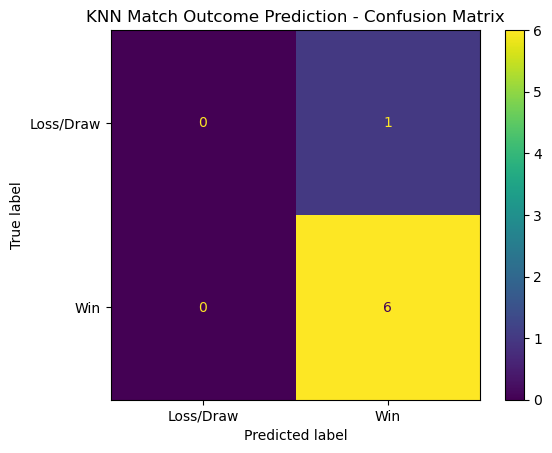

In [22]:
#2. K-Nearest Neighbors (KNN): Predicting Match Outcomes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate Pass Accuracy if not already calculated
teams['Pass_Accuracy'] = (teams['passes_completed'] / teams['passes']) * 100

# Create a basic rule for Match_Result
teams['Match_Result'] = teams['goals'].apply(lambda x: 1 if x > 1 else 0)

# Prepare features and labels
features = teams[['goals', 'possession', 'Pass_Accuracy']]
labels = teams['Match_Result']  # 1 for Win, 0 for Loss/Draw

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5
knn.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Loss/Draw', 'Win'])
plt.title("KNN Match Outcome Prediction - Confusion Matrix")
plt.show()



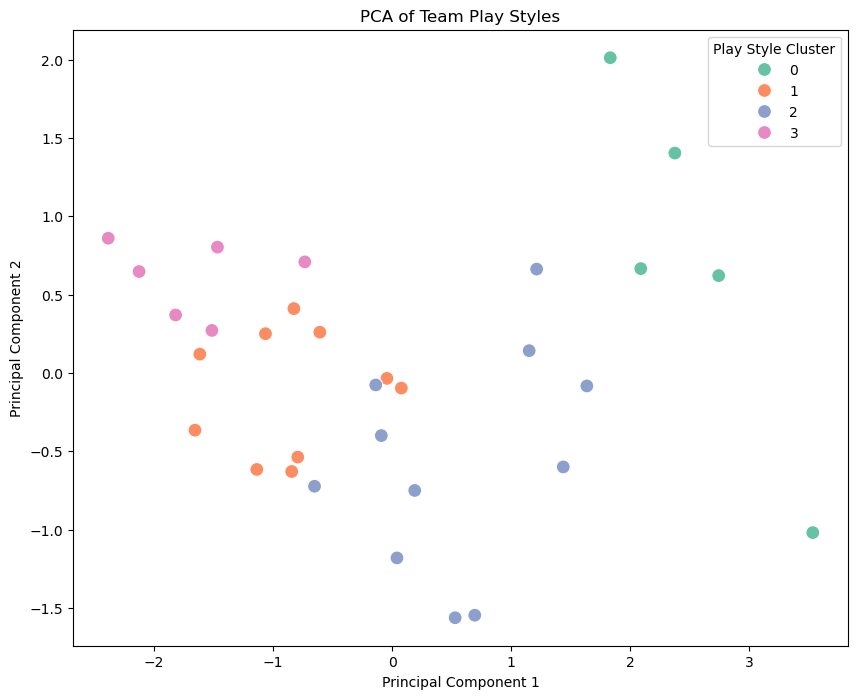

In [24]:
#3. Principal Component Analysis (PCA) for Dimensionality Reduction
from sklearn.decomposition import PCA

# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
team_features_scaled = scaler.fit_transform(team_features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(team_features_scaled)
teams['PCA1'], teams['PCA2'] = principal_components[:, 0], principal_components[:, 1]

# Plot PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(data=teams, x='PCA1', y='PCA2', hue='Play_Style', palette='Set2', s=100)
plt.title("PCA of Team Play Styles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Play Style Cluster')
plt.show()


Mean Squared Error: 0.02655452704756836
R^2 Score: 0.14786525217641766


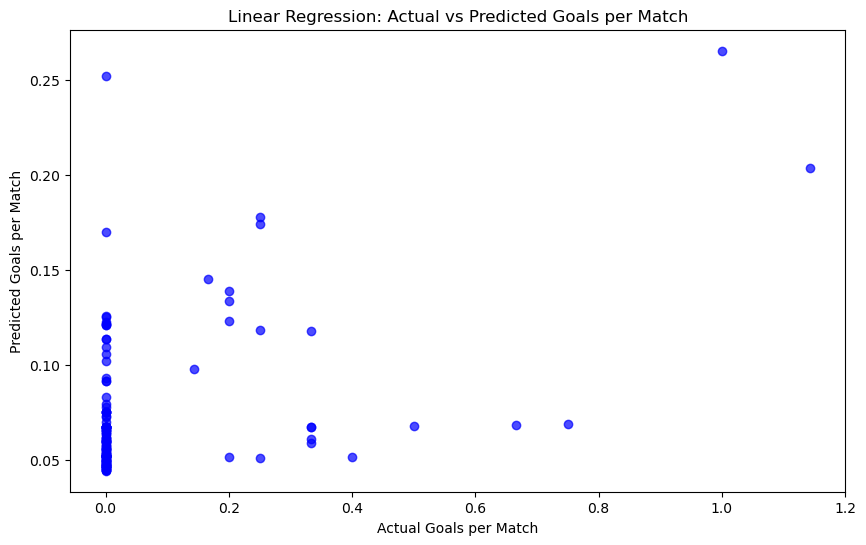

In [32]:
#4. Predicting Player Performance using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Calculate Goals per Match if not already calculated
players['Goals_per_match'] = players['goals'] / players['games']

# Define features and target (without Tackles)
player_features = players[['minutes', 'assists']]  # Adjusting for available columns
target = players['Goals_per_match']

# Split data
X_train, X_test, y_train, y_test = train_test_split(player_features, target, test_size=0.2, random_state=42)

# Train Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Goals per Match")
plt.ylabel("Predicted Goals per Match")
plt.title("Linear Regression: Actual vs Predicted Goals per Match")
plt.show()

